In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Sklearn provides many test data sets. You can use them by ``sklearn.datasets import load_[name of data set]``. For example:

In [116]:
from sklearn.datasets import load_boston

In [117]:
def load_boston():
    # load problematic data set
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    y = raw_df.values[1::2, 2]
    return X, y

In [118]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [119]:
X, y = load_boston()

#model = KNeighborsRegressor()
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pipe.get_params() 

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [120]:
model = GridSearchCV(
    estimator=pipe, 
    param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}, 
    cv=3) # cross validation

In [121]:
model.fit(X, y)
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004217,0.004241,0.001821,0.000273,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001135,0.000111,0.001642,0.000066,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.000877,0.000006,0.001601,0.000119,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.000869,0.000010,0.001647,0.000088,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.000798,0.000036,0.001588,0.000039,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000718,0.000031,0.001404,0.000099,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000684,0.000045,0.001436,0.000100,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000620,0.000031,0.001282,0.000104,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000646,0.000076,0.001302,0.000124,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000533,0.000003,0.001192,0.000085,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [122]:
pred = model.predict(X)

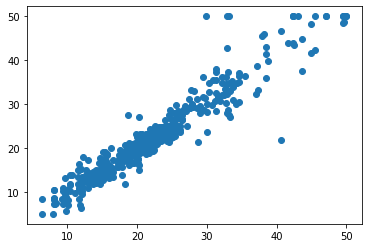

In [123]:
plt.scatter(pred, y)

We can easily swap between different 'models'.

In [124]:
model2 = KNeighborsRegressor()

In [125]:
model2.fit(X, y)

KNeighborsRegressor()

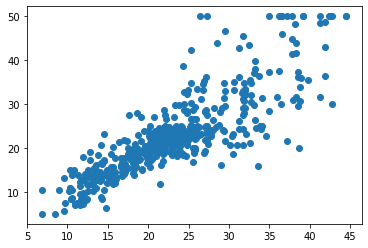

In [126]:
pred2 = model2.predict(X)
plt.scatter(pred2, y)